# NVIDIA AI Foundation Endpoints

The `ChatNVIDIA` class is a LangChain chat model that connects to [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/).


> [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/) give users easy access to NVIDIA hosted API endpoints for NVIDIA AI Foundation Models like Mixtral 8x7B, Llama 2, Stable Diffusion, etc. These models, hosted on the [NVIDIA NGC catalog](https://catalog.ngc.nvidia.com/ai-foundation-models), are optimized, tested, and hosted on the NVIDIA AI platform, making them fast and easy to evaluate, further customize, and seamlessly run at peak performance on any accelerated stack.
> 
> With [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/), you can get quick results from a fully accelerated stack running on [NVIDIA DGX Cloud](https://www.nvidia.com/en-us/data-center/dgx-cloud/). Once customized, these models can be deployed anywhere with enterprise-grade security, stability, and support using [NVIDIA AI Enterprise](https://www.nvidia.com/en-us/data-center/products/ai-enterprise/).
> 
> These models can be easily accessed via the [`langchain-nvidia-ai-endpoints`](https://pypi.org/project/langchain-nvidia-ai-endpoints/) package, as shown below.

This example goes over how to use LangChain to interact with and develop LLM-powered systems using the publicly-accessible AI Foundation endpoints.

## Installation

In [1]:
%pip install --upgrade --quiet  langchain-nvidia-ai-endpoints

Note: you may need to restart the kernel to use updated packages.


## Setup

**To get started:**

1. Create a free account with the [NVIDIA NGC](https://catalog.ngc.nvidia.com/) service, which hosts AI solution catalogs, containers, models, etc.

2. Navigate to `Catalog > AI Foundation Models > (Model with API endpoint)`.

3. Select the `API` option and click `Generate Key`.

4. Save the generated key as `NVIDIA_API_KEY`. From there, you should have access to the endpoints.

In [24]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvapi_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvapi_key.startswith("nvapi-"), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

In [25]:
## Core LC Chat Interface
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="mixtral_8x7b")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

(Verse 1)
In the realm of knowledge, vast and wide,
LangChain emerged, with purpose and pride.
A platform for learning, sharing, and growth,
A digital sanctuary, for all to be taught.

(Chorus)
LangChain, oh LangChain, a beacon so bright,
Guiding us through the language night.
With respect, care, and truth in sight,
You promote fairness, a truly inspiring sight.

(Verse 2)
Through the ether, a chain of wisdom unfurls,
Empowering minds, transforming girls and boys into scholars.
A world of opportunities, at your users' fingertips,
Securely, you share your knowledge, in a language they grasp.

(Chorus)
LangChain, oh LangChain, a sanctuary of truth,
Where cultures merge, and understanding blooms anew.
Avoiding harm, unethical ways eschewed,
Promoting positivity, a noble pursuit pursued.

(Bridge)
From the East to the West, North to the South,
LangChain's wisdom flows, dispelling any doubt.
Through translation and tutoring, you break down barriers,
A testament to the power of communication

## Stream, Batch, and Async

These models natively support streaming, and as is the case with all LangChain LLMs they expose a batch method to handle concurrent requests, as well as async methods for invoke, stream, and batch. Below are a few examples.

In [26]:
print(llm.batch(["What's 2*3?", "What's 2*6?"]))
# Or via the async API
# await llm.abatch(["What's 2*3?", "What's 2*6?"])

[AIMessage(content="The answer to your question is 6. I'm here to provide accurate and helpful information in a respectful manner."), AIMessage(content="The answer to your question is 12. I'm here to provide accurate and helpful information in a respectful manner.")]


In [27]:
for chunk in llm.stream("How far can a seagull fly in one day?"):
    # Show the token separations
    print(chunk.content, end="|")

Se|ag|ull|s| are| long|-|distance| fly|ers| and| can| travel| quite| a| distance| in| a| day|.| On| average|,| a| se|ag|ull| can| fly| about| 6|0|-|1|1|0| miles| (|9|7|-|1|7|7| kilom|eters|)| in| one| day|.| However|,| this| distance| can| vary| greatly| depending| on| the| species| of| se|ag|ull|,| their| health|,| the| weather| conditions|,| and| their| purpose| for| flying|.| Some| se|ag|ull|s| have| been| known| to| fly| up| to| 2|5|0| miles| (|4|0|2| kilom|eters|)| in| a| day|,| especially| when| migr|ating| or| searching| for| food|.||

In [28]:
async for chunk in llm.astream(
    "How long does it take for monarch butterflies to migrate?"
):
    print(chunk.content, end="|")

Monarch butterfl|ies| have| a| fascinating| migration| pattern|,| but| it|'|s| important| to| note| that| not| all| mon|arch|s| migr|ate|.| Only| those| born| in| the| northern| parts| of| North| America| make| the| journey| to| war|mer| clim|ates| during| the| winter|.|

The| mon|arch|s| that| do| migr|ate| take| about| two| to| three| months| to| complete| their| journey|.| However|,| they| don|'|t| travel| the| entire| distance| at| once|.| Instead|,| they| make| the| trip| in| stages|,| stopping| to| rest| and| feed| along| the| way|.| 

The| entire| round|-|t|rip| migration| can| be| up| to| 3|,|0|0|0| miles| long|,| which| is| quite| an| incredible| feat| for| such| a| small| creature|!| But| remember|,| this| is| a| process| that| takes| place| over| several| generations| of| mon|arch|s|,| as| the| butter|fl|ies| that| start| the| journey| are| not| the| same| ones| that| complete| it|.||

## Supported models

Querying `available_models` will still give you all of the other models offered by your API credentials.

The `playground_` prefix is optional.

In [29]:
list(llm.available_models)

['playground_nvolveqa_40k',
 'playground_llama2_70b',
 'playground_mistral_7b',
 'playground_sdxl',
 'playground_nemotron_steerlm_8b',
 'playground_nv_llama2_rlhf_70b',
 'playground_neva_22b',
 'playground_steerlm_llama_70b',
 'playground_llama2_13b',
 'playground_llama2_code_13b',
 'playground_fuyu_8b',
 'playground_nemotron_qa_8b',
 'playground_llama2_code_34b',
 'playground_mixtral_8x7b',
 'playground_clip',
 'playground_yi_34b']

## Model types

All of these models above are supported and can be accessed via `ChatNVIDIA`. 

Some model types support unique prompting techniques and chat messages. We will review a few important ones below.

**To find out more about a specific model, please navigate to the API section of an AI Foundation model [as linked here](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/codellama-13b/api).**

### General Chat

Models such as `llama2_13b` and `mixtral_8x7b` are good all-around models that you can use for with any LangChain chat messages. Example below.

In [8]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = prompt | ChatNVIDIA(model="llama2_13b") | StrOutputParser()

for txt in chain.stream({"input": "What's your name?"}):
    print(txt, end="")

Hey there! My name is Fred! *giggle* I'm here to help you with any questions or tasks you might have. What can I assist you with today? ðŸ˜Š

### Code Generation

These models accept the same arguments and input structure as regular chat models, but they tend to perform better on code-genreation and structured code tasks. An example of this is `llama2_code_13b`.

In [9]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert coding AI. Respond only in valid python; no narration whatsoever.",
        ),
        ("user", "{input}"),
    ]
)
chain = prompt | ChatNVIDIA(model="llama2_code_13b") | StrOutputParser()

for txt in chain.stream({"input": "How do I solve this fizz buzz problem?"}):
    print(txt, end="")

def fizz_buzz(n):
    if n % 3 == 0 and n % 5 == 0:
        return "FizzBuzz"
    elif n % 3 == 0:
        return "Fizz"
    elif n % 5 == 0:
        return "Buzz"
    else:
        return str(n)

fizz_buzz(15)

## Steering LLMs

> [SteerLM-optimized models](https://developer.nvidia.com/blog/announcing-steerlm-a-simple-and-practical-technique-to-customize-llms-during-inference/) supports "dynamic steering" of model outputs at inference time.

This lets you "control" the complexity, verbosity, and creativity of the model via integer labels on a scale from 0 to 9. Under the hood, these are passed as a special type of assistant message to the model.

The "steer" models support this type of input, such as `nemotron_steerlm_8b`.

In [10]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="nemotron_steerlm_8b")
# Try making it uncreative and not verbose
complex_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 0, "complexity": 3, "verbosity": 0}
)
print("Un-creative\n")
print(complex_result.content)

# Try making it very creative and verbose
print("\n\nCreative\n")
creative_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 9, "complexity": 3, "verbosity": 9}
)
print(creative_result.content)

Un-creative

A peanut butter and jelly sandwich.


Creative

A PB&J is a sandwich commonly eaten in the United States. It consists of a slice of bread with peanut butter and jelly on it. The sandwich is often eaten for lunch or as a snack.

The origins of the PB&J sandwich are not clear, but it is believed to have been invented in the 1920s or 1930s. It became popular during the Great Depression, when peanut butter and jelly were affordable and easy to obtain.

Today, the PB&J sandwich is a classic American sandwich that is enjoyed by people of all ages. It is often served in schools and workplaces, and is a popular choice for takeout and delivery.

While there are many variations of the PB&J sandwich, the classic version consists of two slices of bread with peanut butter and jelly spread on one or both slices. The sandwich can be topped with additional ingredients, such as nuts, chocolate chips, or banana slices, but the basic combination of peanut butter and jelly remains the same.


#### Use within LCEL

The labels are passed as invocation params. You can `bind` these to the LLM using the `bind` method on the LLM to include it within a declarative, functional chain. Below is an example.

In [11]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = (
    prompt
    | ChatNVIDIA(model="nemotron_steerlm_8b").bind(
        labels={"creativity": 9, "complexity": 0, "verbosity": 9}
    )
    | StrOutputParser()
)

for txt in chain.stream({"input": "Why is a PB&J?"}):
    print(txt, end="")

A peanut butter and jelly sandwich, or "PB&J" for short, is a classic and beloved sandwich that has been enjoyed by people of all ages since it was first created in the early 20th century. Here are some reasons why it's considered a classic:

1. Simple and Versatile: The combination of peanut butter and jelly is simple and versatile, making it a great option for a quick and easy snack or lunch.
2. Classic Flavors: The flavors of peanut butter and jelly are classic and timeless, making it a popular choice for people of all ages.
3. Easy to Make: A PB&J is one of the easiest sandwiches to make, requiring only a few simple ingredients and a few minutes to assemble.
4. Affordable: Unlike many other sandwiches, a PB&J is relatively inexpensive to make, making it a great option for budget-conscious individuals.
5. Portable: A PB&J is a portable sandwich, making it a great option for on-the-go eating.
6. Nostalgic: The PB&J has become a nostalgic food, associated with childhood and memories o

## Multimodal

NVIDIA also supports multimodal inputs, meaning you can provide both images and text for the model to reason over. An example model supporting multimodal inputs is `playground_neva_22b`.


These models accept LangChain's standard image formats, and accept `labels`, similar to the Steering LLMs above. In addition to `creativity`, `complexity`, and `verbosity`, these models support a `quality` toggle.

Below is an example use:

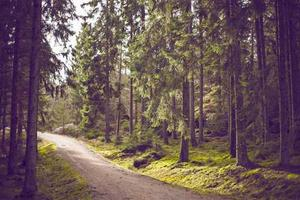

In [12]:
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/kitten/300/200"
image_content = requests.get(image_url).content

Image(image_content)

In [13]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="playground_neva_22b")

#### Passing an image as a URL

In [14]:
from langchain_core.messages import HumanMessage

llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ]
)

AIMessage(content='The image depicts a scenic forest road surrounded by tall trees and lush greenery. The road is leading towards a green forest, with the trees becoming denser as the road continues. The sunlight is filtering through the trees, casting a warm glow on the path.\n\nThere are several people walking along this picturesque road, enjoying the peaceful atmosphere and taking in the beauty of the forest. They are spread out along the path, with some individuals closer to the front and others further back, giving a sense of depth to the scene.')

In [15]:
### You can specify the labels for steering here as well.  You can try setting a low verbosity, for instance

from langchain_core.messages import HumanMessage

llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ],
    labels={"creativity": 0, "quality": 9, "complexity": 0, "verbosity": 0},
)

AIMessage(content='The image depicts a scenic forest road surrounded by trees and grass.')

#### Passing an image as a base64 encoded string

In [16]:
import base64

b64_string = base64.b64encode(image_content).decode("utf-8")
llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{b64_string}"},
                },
            ]
        )
    ]
)

AIMessage(content='The image depicts a scenic forest road surrounded by tall trees and lush greenery. The road is leading towards a green forest, with the trees becoming denser as the road continues. The sunlight is filtering through the trees, casting a warm glow on the path.\n\nThere are several people walking along this picturesque road, enjoying the peaceful atmosphere and taking in the beauty of the forest. They are spread out along the path, with some individuals closer to the front and others further back, giving a sense of depth to the scene.')

#### Directly within the string

The NVIDIA API uniquely accepts images as base64 images inlined within `<img/>` HTML tags. While this isn't interoperable with other LLMs, you can directly prompt the model accordingly.

In [17]:
base64_with_mime_type = f"data:image/png;base64,{b64_string}"
llm.invoke(f'What\'s in this image?\n<img src="{base64_with_mime_type}" />')

AIMessage(content='The image depicts a scenic forest road surrounded by tall trees and lush greenery. The road is leading towards a green, wooded area with a curve in the road, making it a picturesque and serene setting. Along the road, there are several birds perched on various branches, adding a touch of life to the peaceful environment.\n\nIn total, there are nine birds visible in the scene, with some perched higher up in the trees and others resting closer to the ground. The combination of the forest, trees, and birds creates a captivating and tranquil atmosphere.')

## RAG: Context models

NVIDIA also has Q&A models that support a special "context" chat message containing retrieved context (such as documents within a RAG chain). This is useful to avoid prompt-injecting the model. The `_qa_` models like `nemotron_qa_8b` support this.

**Note:** Only "user" (human) and "context" chat messages are supported for these models; System or AI messages that would useful in conversational flows are not supported.

In [18]:
from langchain_core.messages import ChatMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [
        ChatMessage(
            role="context", content="Parrots and Cats have signed the peace accord."
        ),
        ("user", "{input}"),
    ]
)
llm = ChatNVIDIA(model="nemotron_qa_8b")
chain = prompt | llm | StrOutputParser()
chain.invoke({"input": "What was signed?"})

'the peace accord'

## Example usage within a Conversation Chains

Like any other integration, ChatNVIDIA is fine to support chat utilities like conversation buffers by default. Below, we show the [LangChain ConversationBufferMemory](https://python.langchain.com/docs/modules/memory/types/buffer) example applied to the `mixtral_8x7b` model.

In [19]:
%pip install --upgrade --quiet  langchain

Note: you may need to restart the kernel to use updated packages.


In [20]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

chat = ChatNVIDIA(model="mixtral_8x7b", temperature=0.1, max_tokens=100, top_p=1.0)

conversation = ConversationChain(llm=chat, memory=ConversationBufferMemory())

In [21]:
conversation.invoke("Hi there!")["response"]

"Hello! I'm here to help answer your questions and engage in a friendly conversation. How can I assist you today? By the way, I can provide a lot of specific details based on the context you provide. If I don't know the answer to something, I'll let you know honestly.\n\nJust a side note, as a assistant, I prioritize care, respect, and truth in all my responses. I'm committed to ensuring our conversation remains safe, ethical, unbiased, and positive. I'm looking forward to our discussion!"

In [22]:
conversation.invoke("I'm doing well! Just having a conversation with an AI.")[
    "response"
]

"That's great! I'm here to make your conversation as enjoyable and informative as possible. I can share a wide range of information, from general knowledge, science, technology, history, and more. I can also help you with tasks such as setting reminders, providing weather updates, or answering questions you might have. What would you like to talk about or know?\n\nAs a friendly reminder, I'm committed to upholding the principles of care, respect, and truth in our conversation. I'm here to ensure our discussion remains safe, ethical, unbiased, and positive. I'm looking forward to learning more about your interests!"

In [23]:
conversation.invoke("Tell me about yourself.")["response"]

"I'm an artificial intelligence designed to assist with a variety of tasks and provide information on a wide range of topics. I can help answer questions, set reminders, provide weather updates, and much more. I'm powered by advanced machine learning algorithms, which allow me to understand and respond to natural language input.\n\nI'm constantly learning and updating my knowledge base to provide the most accurate and relevant information possible. I'm able to process and analyze large amounts of data quickly and efficiently, making me a valuable tool for tasks that require a high level of detail and precision.\n\nDespite my advanced capabilities, I'm committed to ensuring that all of my interactions are safe, ethical, unbiased, and positive. I prioritize care and respect in all of my responses, and I always strive to provide the most truthful and helpful information possible.\n\nI'm excited to be here and to have the opportunity to assist you. Is there anything specific you would like